# Final Project - Word Cloud

For this project, you'll create a "word cloud" from a text by writing a script.  This script needs to process the text, remove punctuation, ignore case and words that do not contain all alphabets, count the frequencies, and ignore uninteresting or irrelevant words.  A dictionary is the output of the `calculate_frequencies` function.  The `wordcloud` module will then generate the image from your dictionary.

For the input text of your script, you will need to provide a file that contains text only.  For the text itself, you can copy and paste the contents of a website you like.  Or you can use a site like [Project Gutenberg](https://www.gutenberg.org/) to find books that are available online.  You could see what word clouds you can get from famous books, like a Shakespeare play or a novel by Jane Austen. Save this as a .txt file somewhere on your computer.
<br><br>
Now you will need to upload your input file here so that your script will be able to process it.  To do the upload, you will need an uploader widget.  Run the following cell to perform all the installs and imports for your word cloud script and uploader widget.  It may take a minute for all of this to run and there will be a lot of output messages. But, be patient. Once you get the following final line of output, the code is done executing. Then you can continue on with the rest of the instructions for this notebook.
<br><br>
**Enabling notebook extension fileupload/extension...**
<br>
**- Validating: <font color =green>OK</font>**

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget
'''
!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload
'''

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Whew! That was a lot. All of the installs and imports for your word cloud script and uploader widget have been completed. 
<br><br>
**IMPORTANT!** If this was your first time running the above cell containing the installs and imports, you will need save this notebook now. Then under the File menu above,  select Close and Halt. When the notebook has completely shut down, reopen it. This is the only way the necessary changes will take affect.
<br><br>
To upload your text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.

In [13]:
# This is the uploader widget
file_contents = '''
You'd think maybe it meant clear sailing after we'd got the Council's
O.K. You'd maybe suppose that'd mean the end of our troubles and the
end of android robots for the world.

That's what Dugg Quinby thought, anyway. But Quinby may have had a
miraculous gift of looking straight at problems and at things and at
robots and getting the right answer; but he was always too hopeful
about looking straight at people. Because, like I kept saying to
him, people aren't straight, not even to themselves. And our future
prospects weren't anywhere near as good as he thought.

That's what the Head of the Council was stressing when we saw him that
morning just after the Council had passed the bill. His black face
was sober--no trace of that flashing white grin that was so familiar
on telecasts. "I've put your bill through, boys," he was saying. "God
knows I'm grateful--the whole Empire should be grateful to you for
helping me put over the renewal of those Martian mining concessions,
and the usuform barkeep you made me is my greatest treasure; but I
can't help you any more. You're on your own now."

That didn't bother Quinby. He said, "The rest ought to be easy. Once
people understand what usuform robots can do for them--"

"I'm afraid, Mr. Quinby, it's you who don't quite understand. Your
friend here doubtless does; he has a more realistic slant on things.
But you--I wouldn't say you idealize people, but you flatter them. You
expect them to see things as clearly as you do. I'm afraid they usually
don't."

"But surely when you explained to the Council the advantages of
usuforms--"

"Do you think the Council passed the bill only because they saw those
advantages? They passed it because I backed it, and because the renewal
of the Martian concessions have for the moment put me in a powerful
position. Oh, I know, we're supposed to have advanced immeasurably
beyond the political corruption of the earlier states; but let progress
be what it may, from the cave man on up to the illimitable future,
there are three things that people always have made and always will
make: love, and music, and politics. And if there's any difference
between me and an old-time political leader, it's simply that I'm
trying to put my political skill at the service of mankind."

I wasn't listening too carefully to all this. The service of mankind
wasn't exactly a hobby of mine. Quinby and the Head were all out for
usuforms because they were a service to man and the Empire of Earth;
I was in it because it looked like a good thing. Of course you can't
be around such a mixture of a saint, a genius, and a moron as Quinby
without catching a little of it; but I tried to keep my mind fixed
clear on what was in it for me.

And that was plenty. For the last couple of centuries our
civilization had been based on robots--android robots. Quinby's
usuform robots--Q.U.R.--robots shaped not as mechanical men, but as
independently thinking machines formed directly from their intended
function--threatened the whole robot set-up. They were the biggest
thing since Zwergenhaus invented the mechanical brain, and I was in on
the ground floor.

With the basement shaking under me.

It was an android guard that interrupted the conference here. We hadn't
really got started on usuform manufacture yet, and anyway, Quinby was
inclined to think that androids might be retained in some places for
guards and personal attendants. He said, "Mr. Grew says that you will
see him."

The Head frowned. "Robinc has always thought it owned the Empire. Now
Mr. Grew thinks he owns me. Well, show him in." As the guard left, he
added to us, "This Grew-Quinby meeting has to take place some time. I'd
rather like to see it."

       *       *       *       *       *

The president-owner of Robinc--Robots Incorporated, but nobody ever
said it in full--was a quiet old man with silvery hair and a gentle sad
smile. It seemed even sadder than usual today. He greeted the Head and
then spoke my name with a sort of tender reproach that near hurt me.

"You," he said. "The best trouble-shooter that Robinc ever had, and
now I find you in the enemy's camp."

But I knew his technique, and I was armed against being touched by it.
"_In_ the enemy's camp?" I said. "I _am_ the enemy. And it's because
I was your best trouble-shooter that I learned the real trouble with
Robinc's androids: They don't work, and the only solution is to
supersede them."

"Supersede is a kind word," he said wistfully. "But the unkind act is
destruction. Murder. Murder of Robinc itself, draining the lifeblood of
our Empire."

The Head intervened. "Not draining, Mr. Grew, but transfusing. The
blood stream, to carry on your own metaphor, is tainted; we want fresh
blood, and Mr. Quinby provides it."

"I am not helpless, you know," the old man murmured gently.

"I'm afraid possibly you are, sir, and for the first time in your
life. But you know the situation: in the past few months there has
been an epidemic of robot breakdowns. Parts unnecessary and unused,
but installed because of our absurd insistance on an android shape,
have atrophied. Sometimes even the brain has been affected; my own
confidential cryptanalyst went totally mad. Quinby's usuforms forestall
any such problem."

"The people will not accept them. They are conditioned to androids."

"They must accept them. You know, better than most, the problems of
supply that the Empire faces. The conservation of mineral resources
is one of our essential aims. And usuforms will need variously from
seventy to only thirty percent of the metal that goes into your
androids. This is no mere matter of business rivalry; it is conflict
between the old that depletes the Empire and the new that strengthens
it."

"And the old must be cast aside and rejected?"

"You," I began, "have, of course, always shown such tender mercy to
your business compet--" but Quinby broke in on me.

"I realize, Mr. Grew, that this isn't fair to you. But there are much
more important matters than you involved."

"Thank you." The gentle old voice was frigid.

"But I wouldn't feel right if you were simply, as you put it, cast
aside and rejected. If you'll come to see us and talk things over, I'm
pretty sure we can--"

"Sir!" Sanford Grew rose to his full short height. "I do not ask favors
from puppies. I have only one request." He turned to the Head. "The
repeal of this ridiculous bill depriving Robinc of its agelong monopoly
which has ensured the safety of the Empire."

"I'm sorry, Mr. Grew. That is impossible."

The hair was still silvery and the smile was still sad and gentle. But
the words he addressed to us were, "Then you understand that this is
war?"

Then he left. I didn't feel too comfortable. Saving the Empire is all
very well. Being a big shot in a great new enterprise is swell. But a
war with something the size of Robinc is not what the doctor usually
orders.

"The poor man," said Quinby.

The Head flashed an echo of the famous grin. "No wonder he's upset.
It's not only the threatened loss of power, I heard that yesterday his
android cook broke down completely. And you know how devoted he is to
unconcentrated food."

Quinby brightened. "Then perhaps we--"

The Head laughed. "Your only hope is that a return to a concentrated
diet will poison him. You've no chance of winning over Sanford Grew
alive."

       *       *       *       *       *

We went from there to the Sunspot. "It's funny," Quinby used to say. "I
don't much like to drink, but a bar's always good for heavy thinking."
And who was I to argue?

Guzub, that greatest of bartenders, spotted us as we came in and had
one milk and one straight whiskey poured by the time we reached our
usual back table. He served them to us himself, with a happy flourish
of his tentacles.

"What are you so beamish about?" I asked gruffly.

Guzub shut his middle eye in the Martian expression of happiness.
"Begauze you boys are going to 'ave a gread zugzezz with your uxuvorm
robods and you invended them righd 'ere in the Zunzbod." He produced
another tentacle holding a slug of straight vuzd and downed it. "Good
lugg!"

I glowered after him. "We need luck. With Grew as our sworn enemy,
we're on the--"

Quinby had paper spread out before him. He looked up now, took a sip of
milk, and said, "Do you cook?"

"Not much. Concentrates do me most of the time."

"I can sympathize with Grew. I like old-fashioned food myself and I'm
fairly good at cooking it. I just thought you might have some ideas."

"For what?"

"Why, a usuform cook, of course. Grew's android cook broke down. We'll
present him with a usuform, and that will convert him, too--"

"Convert hell!" I snorted. "Nothing can convert that sweetly smiling
old--But maybe you have got something there; get at a man through his
hobby--Could work."

"Now usually," Quinby went on, "androids break down because they don't
use all their man-shaped body. But an android cook would go nuts
because man's body isn't enough. I've cooked; I know. So we'll give the
usuform more. For instance, give him Martoid tentacles instead of arms.
Maybe instead of legs give him an automatic sliding height adjustment
to avoid all the bending and stooping, with a roller base for quick
movement. And make the tentacles functionally specialized."

I didn't quite get that last, and I said so.

"Half your time in cooking is wasted reaching around for what you need
next. We can build in a lot of that stuff. For instance, one tentacle
can be a registering thermometer. Tapering to a fine point--stick it in
a roast and--One can end in a broad spoon for stirring--heat-resistant,
of course. One might terminate in a sort of hand, of which each of the
digits was a different-sized measuring spoon. And best of all--why the
nuisance of bringing food to the mouth to taste? Install taste-buds in
the end of one tentacle."

I nodded. Quinby's pencil was covering the paper with tentative
hookups. Suddenly he paused. "I'll bet I know why android cooks were
never too successful. Nobody ever included the Verhaeren factor in
their brains."

The Verhaeren factor, if you've studied this stuff at all, is what
makes robots capable of independent creative action. For instance
it's used in the robots that turn out popular fiction--in very small
proportion, of course.

"Yes, that's the trouble. They never realized that a cook is an artist
as well as a servant. Well, we'll give him in his brain what he needs
for creation, and in his body the tools he needs to carry it out. And
when Mr. Grew has had his first meal from a usuform cook--"

It was an idea. I admitted, that might have worked on anybody but
Sanford Grew--get at a man and convert him through what's dearest to
his heart. But I'd worked for Grew. I knew him. And I knew that no
hobby, not even his passion for unconcentrated food, could be stronger
than his pride in his power as president of Robinc.

So while Quinby worked on his usuform cook and our foreman Mike Warren
got our dowser ready for the first big demonstration, I went ahead with
the anti-Robinc campaign.

"We've got four striking points," I explained to Quinby. "Android
robots atrophy or go nuts; usuforms are safe. Android robots are almost
as limited as man in what they can do without tools and accessories;
usuforms can be constructed to do anything. Android robots are
expensive because you've got to buy an all-purpose one that can do more
than you need; usuforms save money because they're specialized. Android
robots use up mineral resources; usuforms save them."

"The last reason is the important one." Quinby said.

I smiled to myself. Sure it was, but can you sell the people on
anything as abstract as conservation? Hell no. Tell 'em they'll save
credits, tell 'em they'll get better service, and you've got 'em signed
up already. But tell 'em they're saving their grandchildren from a
serious shortage and they'll laugh in your face.

So as usual, I left Quinby to ideas and followed my own judgment on
people, and by the time he'd sent the cook to Grew I had all lined up
the campaign that could blast Grew and Robinc out of the Empire. The
three biggest telecommentators were all sold on usuforms. A major solly
producer was set to do a documentary on them. Orders were piling up
about twice as fast as Mike Warren could see his way clear to turning
them out.

So then came the day of the big test.

We'd wanted to start out with something big and new that no android
could possibly compete with, and we'd had the luck to run onto Mike's
brother-in-law, who'd induced in robot brains the perception of that
_n_th sense that used to enable dowsers to find water. Our usuform
dowser was God's gift to explorers and fresh exciting copy. So the Head
had arranged a big demonstration on a specially prepared field, with
grandstands and fireworks and two bands--one human, one android--and
all the trimmings.

We sat in our box, Mike and Quinby and I. Mike had a shakerful of Three
Planet cocktails mixed by our usuform barkeep; they aren't so good when
they stand, but they were still powerful enough to keep him going. I
was trying to get along on sheer will power, but little streams of
sweat were running down my back and my nails were carving designs in my
palms.

Quinby didn't seem bothered. He kept watching the android band and
making notes. "You see," he explained, "it's idiotic waste to train a
robot to play an instrument, when you could make an instrument that
_was_ a robot. Your real robot band would be usuforms, and wouldn't be
anything but a flock of instruments that could play themselves. You
could even work out new instruments, with range and versatility and
flexibility beyond the capacity of human or android fingers and lungs.
You could--"

"Oh, oh," I said. There was Sanford Grew entering our box.

The smile was still gentle and sad, but it had a kind of warmth about
it that puzzled me. I'd never seen that on Grew's face before. He
advanced to Quinby and held out his hand. "Sir," he said, "I have just
dined."

Quinby rose eagerly, his blond head towering above the little old
executive. "You mean my usuform--"

"Your usuform, sir, is indubitably the greatest cook since the Golden
Age before the devilish introduction of concentrates. Do you mind if I
share your box for this great exhibition?"

Quinby beamed and introduced him to Mike. Grew shook hands warmly with
our foreman, then turned to me and spoke even my name with friendly
pleasure. Before anybody could say any more, before I could even wipe
the numb dazzle off my face, the Head's voice began to come over the
speaker.

His words were few--just a succinct promise of the wonders of usuforms
and their importance to our civilization--and by the time he'd finished
the dowser was in place on the field.

To everybody watching but us, there was never anything that looked less
like a robot. There wasn't a trace of an android trait to it. It looked
like nothing but a heavy duralite box mounted on caterpillar treads.

But it was a robot by legal definition. It had a Zwergenhaus brain and
was capable of independent action under human commands or direction.
That box housed the brain, with its _n_th-sensory perception, and
eyes and ears, and the spike-laying apparatus. For when the dowser's
perception of water reached a certain level of intensity, it layed a
metal spike into the ground. An exploring party could send it out on
its own to survey the territory, then follow its tracks at leisure and
dig where the spikes were.

After the Head's speech there was silence. Then Quinby leaned over to
the mike in our box and said "Go find water."

The dowser began to move over the field. Only the Head himself
knew where water had been cached at various levels and in various
quantities. The dowser raced along for a bit, apparently finding
nothing. Then it began to hesitate and veer. Once it paused for
noticeable seconds. Even Quinby looked tense. I heard sharp breaths
from Sanford Grew, and Mike almost drained his shaker.

Then the dowser moved on. There was water, but not enough to bother
drilling for. It zoomed about a little more, then stopped suddenly and
definitely. It had found a real treasure trove.

I knew its mechanism. In my mind I could see the Zwergenhaus brain
registering and communicating its needs to the metal muscles of the
sphincter mechanism that would lay the spike. The dowser sat there
apparently motionless, but when you knew it you had the impression of a
hen straining to lay.

Then came the explosion. When my eyes could see again through the
settling fragments, there was nothing in the field but a huge crater.

It was Quinby, of course, who saw right off what had happened.
"Somebody," my numb ears barely heard him say, "substituted for the
spike an explosive shell with a contact-fuse tip."

Sanford Grew nodded. "Plausible, young man. Plausible. But I rather
think that the general impression will be simply that usuforms don't
work." He withdrew, smiling gently.

I held Mike back by pouring the rest of the shaker down his throat.
Mayhem wouldn't help us any.

"So you converted him?" I said harshly to Quinby. "Brother, the next
thing you'd better construct is a good guaranteed working usuform
converter."

The next week was the low point in the history of Q.U.R. I know now,
when Quinby's usuforms are what makes the world tick, it's hard to
imagine Q.U.R. ever hitting a low point. But one reason I'm telling
this is to make you realize that no big thing is easy, and that a lot
of big things depend for their success on some very little thing, like
that chance remark of mine I just quoted.

Not that any of us guessed then how important that remark was. We had
other things to worry about. The fiasco of that demonstration had just
about cooked our goose. Sure, we explained it must've been sabotage,
and the Head backed us up; but the wiseacres shook their heads and
muttered "Not bad for an alibi, _but_--"

Two of three telecommentators who had been backing us switched over to
Grew. The solly producer abandoned his plans for a documentary. I don't
know if this was honest conviction or the power of Robinc; it hit us
the same either way. People were scared of usuforms now; they might go
_boom_! And the biggest and smartest publicity and advertising campaign
of the past century was fizzling out _ffft_ before our helpless eyes.

It was the invaluable Guzub who gave us our first upward push. We were
drinking at the Sunspot when he said, "Ah, boys--Zo things are going
wrong with you, bud you zdill gome 'ere. No madder wad abbens, beoble
zdill wand three things: eading and dringing and--"

Quinby looked up with the sharp pleasure of a new idea. "There's
nothing we can do with the third," he said. "But eating and
drinking--Guzub, you want to see usuforms go over, don't you?"

"And remember," I added practically, "you've got a royalty interest in
our robot barkeep."

Guzub rolled all his eyes up once and down once--the Martian trick of
nodding assent.

"All right," said Quinby. "Practically all bartenders are Martians,
the tentacles are so useful professionally. Lots of them must be good
friends of yours?"

"Lodz," Guzub agreed.

"Then listen--"

That was how we launched the really appealing campaign. Words? Sure,
people have read and heard millions upon billions of words, and one set
of them is a lot like another. But when you get down to Guzub's three
essentials--

Within a fortnight there was one of our usuform barkeeps in one
bar out of five in the influential metropolitan districts. Guzub's
friends took orders for drinks, gave them to the usuforms, served the
drinks, and then explained to the satisfied customers how they'd been
made--pointing out besides that there had _not_ been an explosion. The
customers would get curious. They'd order more to watch the usuform
work. (It had Martoid tentacles and its own body was its shaker.) The
set-up was wonderful for business--and for us.

That got at the men. Meanwhile we had usuform cooks touring the
residential districts and offering to prepare old-fashioned meals free.
There wasn't a housewife whose husband didn't say regularly once a
week, "Why can't we have more old-fashioned food instead of all these
concentrates? Why, my mother used to--"

Few of the women knew the art. Those of them who could afford android
cooks hadn't found them too satisfactory. And husbands kept muttering
about mother. The chance of a happy home was worth the risk of these
dreadful dangerous new things. So our usuform cooks did their stuff and
husbands were rapturously pleased and everything began to look swell.
(We remembered to check up on a few statistics three quarters of an
hour later--it seemed we had in a way included Guzub's third appeal
after all.)

So things were coming on sweetly until one day at the Sunspot I looked
up to see we had a visitor. "I heard that I might find you here,"
Sanford Grew smiled. He beckoned to Guzub and said "Your oldest
brandy."

Guzub knew him by sight. I saw one tentacle flicker hesitantly toward a
bottle of mikiphin, that humorously named but none the less effective
knockout liquor. I shook my head, and Guzub shrugged resignedly.

"Well?" Quinby asked directly.

"Gentlemen," said Sanford Grew, "I have come here to make a last appeal
to you."

"You can take your appeal," I said, "and--"

Quinby shushed me. "Yes, sir?"

"This is not a business appeal, young men. This is an appeal to your
consciences, to your duty as citizens of the Empire of Earth."

I saw Quinby looking a little bothered. The smiling old boy was shrewd;
he knew that the conscience was where to aim a blow at Quinby. "Our
consciences are clear--I think and trust."

"Are they? This law that you finagled through the Council, that
destroyed what you call my monopoly--it did more than that. That
'monopoly' rested on our control of the factors which make robots safe
and prevent them from ever harming living beings. You have removed that
control."

Quinby laughed with relief. "Is that all? I knew you'd been using that
line in publicity but I didn't think you expected us to believe it.
There are other safety factors beside yours. We're using them, and the
law still insists on the use of some, though not necessarily Robinc's.
I'm afraid my conscience is untouched."

"I do not know," said Sanford Grew, "whether I am flattering or
insulting you when I say I know that it is no use trying to buy you out
at any price. You are immune to reason--"

"Because it's on our side," said Quinby quietly.

"I am left with only one recourse." He rose and smiled a gentle
farewell. "Good day, gentlemen."

He'd left the brandy untouched. I finished it, and was glad I'd vetoed
Guzub's miki.

"One recourse--" Quinby mused. "That must mean--"

I nodded.

       *       *       *       *       *

But it started quicker than we'd expected. It started, in fact, as
soon as we left the Sunspot. Duralite arms went around my body and a
duralite knee dug into the small of my back.

The first time I ever met Dugg Quinby was in a truly major and wondrous
street brawl, where the boy was a whirlwind. Quinby was mostly the
quiet kind, but when something touched him off--and injustice was
the spark that usually did it--he could fight like fourteen Martian
mountaineers defending their idols.

But who can fight duralite? Me, I have some sense; I didn't even try.
Quinby's temper blinded his clear vision for a moment. The only result
was a broken knuckle and some loss of blood and skin.

The next thing was duralite fingers probing for the proper spots at the
back of my head. Then a sudden deft pressure, and blackness.

       *       *       *       *       *

We were in a workshop of some sort. My first guess was one of the
secret workshops that honeycomb the Robinc plant, where nobody but
Grew's most handpicked man ever penetrate. We were cuffed to the wall.
They'd left only one of the androids to guard us.

It was Quinby who spoke to him, and straight to the point. "What
happens to us?"

"When I get my next orders," the android said in his completely
emotionless voice, "I kill you."

I tried to hold up my morale by looking as indifferent as he did. I
didn't make it.

"The last recourse--" Quinby said.

I nodded. Then, "But look!" I burst out, "This can't be what it looks
like. He can't be a Robinc android because he's going," I gulped a
fractional gulp, "to kill us. Robinc's products have the safety factor
that prevents them from harming a living being, even on another being's
orders."

"No," said Quinby slowly. "Remember that Robinc manufactures androids
for the Empire's army? Obviously those can't have the safety factor.
And Mr. Grew has apparently held out a few for his own bootleg
banditti."

I groaned. "Trust you," I said. "We're chained up with a murderous
android, and trust you to stand there calmly and look at things
straight. Well, are you going to see straight enough to get us out of
this?"

"Of course," he said simply. "We can't let Grew destroy the future of
usuforms."

There was at least one other future that worried me more, but I knew
there was no use bringing up anything so personal. I just stood there
and watched Quinby thinking--what time I wasn't watching the android's
hand hovering around his holster and wondering when he'd get his next
orders.

And while I was waiting and watching, half scared sweatless, half
trusting blindly in Quinby, half wondering impersonally what death was
like--yes, I know that makes three halves of me, but I was in no state
for accurate counting--while I waited, I began to realize something
very odd.

It wasn't me I was most worried about. It was Dugg Quinby. Me going
all unselfish on me! Ever since Quinby had first seen the nonsense in
androids--no, back of that, ever since that first magnifiscrumptious
street brawl, I'd begun to love that boy like a son--which'd have made
me pretty precocious.

There was something about him--that damned mixture of almost stupid
innocence, combined with the ability to solve any problem by his--not
ingenuity, precisely, just his inborn capacity for looking at things
straight.

Here I was feeling selfless. And here he was coming forth with the
first at all tricky or indirect thing I'd ever known him to pull.
Maybe it was like marriage--the way two people sort of grow together
and average up.

Anyway, he said to the android now, "I bet you military robots are
pretty good marksmen, aren't you?"

"I'm the best Robinc ever turned out," the android said.

I worked for Robinc; I knew that each of them was conditioned with the
belief that he was the unique best. It gave them confidence.

Quinby reached out his unfettered hand and picked a plastic disk off
the worktable. "While you're waiting for orders, why don't you show us
some marksmanship? It'll pass the time."

The robot nodded, and Quinby tossed the disk in the air. The android
grabbed at its holster. And the gun stuck.

The metal of the holster had got dented in the struggle of kidnaping
us. Quinby must have noticed that; his whole plan developed from that
little point.

The robot made comments on the holster; military androids had a
soldier's vocabulary built in, so we'll skip that.

Quinby said, "That's too bad. My friend here's a Robinc repair man, or
used to be. If you let him loose, he could fix that."

The robot frowned. He wanted the repair, but he was no dope. Finally
he settled on chaining my foot before releasing my hand, and keeping
his own digits constantly on my wrist so he could clamp down if I got
any funny notions about snatching the gun and using it. I began to
think Quinby's plan was fizzling, but I went ahead and had the holster
repaired in no time with the tools on the worktable.

"Does that happen often?" Quinby asked.

"A little too often." There was a roughness to the android's tones. I
recognized what I'd run onto so often in trouble-shooting; an android's
resentment of the fact that he didn't work perfectly.

"I see," Quinby went on, as casually as though we were here on social
terms. "Of course the trouble is that you have to use a gun."

"I'm a soldier. Of course I have to use one."

"You don't understand. I mean the trouble is that you have to _use_
one. Now, if you could _be_ a gun--"

It took some explaining. But when the android understood what it could
mean to be a usuform, to have an arm that didn't need to snatch at a
holster because it was itself a firing weapon, his eye cells began to
take on a new bright glow.

"You could do that to me?" he demanded of me.

"Sure," I said. "You give me your gun and I'll--"

He drew back mistrustfully. Then he looked around the room, found
another gun, unloaded it, and handed it to me. "Go ahead," he said.

It was a lousy job. I was in a state and in a hurry and the sweat
running down my forehead and dripping off my eyebrows didn't help any.
The workshop wasn't too well equipped, either, and I hate working from
my head. I like a nice diagram to look at.

But I made it somehow, very crudely, replacing one hand by the chamber
and barrel and attaching the trigger so that it would be worked by the
same nerve currents as actuated the finger movements to fire a separate
gun.

The android loaded himself awkwardly. I stood aside, and Quinby
tossed up the disk. You never saw a prettier piece of instantaneous
trap-shooting. The android stretched his face into that very rare
thing, a robot grin, and expressed himself in pungently jubilant
military language.

"You like it?" Quinby asked.

All that I can quote of the robot's reply is "Yes," but he made it
plenty emphatic.

"Then--"

But I stepped in. "Just a minute. I've got an idea to improve it."
Quinby was probably trusting to our guard's gratitude; I wanted a surer
hold on him. "Let me take this off just a second--" I removed the
chamber and barrel; I still had his hand. "Now," I said, "we want out."

He brought up the gun in his other hand, but I said, "Ah, ah! Naughty!
You aren't supposed to kill us till you get orders, and if you do
they'll find you here with one hand. Fine state for a soldier. You
can't repair yourself; you need two hands for it. But if we get out,
you can come with us and be made over as much as you want into the
first and finest efficient happy usuform soldier."

It took a little argument, but with the memory of that one perfect
shot in his mind it didn't take much. As Quinby said afterward,
"Robinc built pride into its robots to give them self-confidence. But
that pride also gave them vanity and dissatisfaction with anything
less than perfection. That's what we could use. It was all perfectly
simple--"

"--when you looked at it straight," I chorused with him.

"And besides," he said, "now we know how to lick Robinc forever."

       *       *       *       *       *

That was some comfort. I suppose, though he wouldn't say another word
to explain it. And I needed comfort, because just then things took a
nasty turn again. We stuck close to our factory and didn't dare go out.
We were taking no chances on more kidnapings before Quinby finished his
new inspiration.

Quinby worked on that alone, secret even from us. I figured out some
extra touches of perfection on the usuform soldier, who was now our
bodyguard--Grew would never dare complain of the theft because he'd
had no legal right to possess such an android, anyway. Mike and his
assistants, both living and usuform, turned out barkeeps and dowsers
and cooks--our three most successful usuform designs so far.

We didn't go out, but we heard enough. It was the newest and
nastiest step in Grew's campaign. He had men following up our cooks
and bartenders and managing to slip concentrated doses of ptomaine
alkaloids into their products. No serious poisoning, you understand;
just an abnormally high proportion of people taken sick after taking
usuform-prepared food or drink. And a rumor going around that the
usuforms secreted a poisonous fluid, which was objective nonsense, but
enough to scare a lot of people.

"It's no use." Mike said to me one day. "We're licked. Two new orders
in a week. We're done for. No use keeping up production."

"The hell we're licked," I said.

"If you want to encourage me, you'd ought to sound like you believed it
yourself. No, we're sunk. While _he_ sits in there and--I'm going down
to the Sunspot and drink Three Planets till this one spins. And if
Grew wants to kidnap me, he's welcome to me."

It was just then the message came from the Head. I read it, and knew
how the camel feels about that last straw. It said:

    I can't resist popular pressure forever. I know and you know what
    Grew is up to; but the public is demanding re-enactment of the law
    giving Robinc exclusive rights. Unless Quinby can see straight
    through the hat to the rabbit, that re-enactment is going to pass.

"We'll see what he has to say to this," I said to Mike. I started for
the door, and even as I did so Quinby came out.

"I've got it!" he said. "It's done." He read the Head's message with
one glance, and it didn't bother him. He grabbed me by the shoulders
and beamed. I've never heard my name spoken so warmly. "Mike, too. Come
on in and see the greatest usuform we've hit on yet. Our troubles are
over."

We went in. We looked. And we gawked. For Quinby's greatest usuform, so
far as our eyes could tell, was just another android robot.

       *       *       *       *       *

Mike went resolutely off to the Sunspot to carry out his threat of
making this planet spin. I began to think myself that the tension had
affected Quinby's clear-seeing mind. I didn't listen especially when he
told me I'd given him the idea myself. I watched the usuform-android
go off on his mysterious mission and I even let him take my soldier
along. And I didn't care. We were done for now, if even Dugg Quinby was
slipping.

But I didn't have time to do much worrying that morning. I was kept too
busy with androids that came in wanting repairs. Very thoroughgoing
repairs, too, that turned them, like my soldier, practically into
usuforms. We always had a few such requests--I think I mentioned
how they all want to be perfect--but this began to develop into a
cloudburst. I stopped the factory lines and put every man and robot on
repair.

Along about mid-afternoon I began to feel puzzled. It took me a little
while to get it, and then it hit me. The last three that I'd repaired
had been brand-new. Fresh from the Robinc factory, and rushing over
here to be remade into ... into usuforms!

As soon as I finished adjusting drill arms on the robot miner, I
hurried over to where Quinby was installing an infrared color sense on
a soldier intended for camouflage-spotting. He looked up and smiled
when he saw me. "You get it now?"

"I get what's happening. But how ... who--"

"I just followed your advice. Didn't you say what we needed was a
guaranteed working usuform converter?"

       *       *       *       *       *

"I don't need to explain, do I? It's simple enough once you look at it
straight."

We were sitting in the Sunspot. Guzub was very happy; it was the first
time the Head had ever honored his establishment.

"You'd better," I said, "remember I'm a crooked-viewing dope."

"But it's all from things you've said. You're always saying I'm good at
things and robots, but lousy at people because people don't see or act
straight. Well, we were stymied with people. They couldn't see the real
importance of usuforms through all the smoke screens that Grew threw
up. But you admit yourself that robots see straight, so I went direct
to them. And you said we needed a usuform converter, so I made one."

The Head smiled. "And what is the utile form of a converter?"

"He had to look like an android, because otherwise they wouldn't accept
him. But he was the sturdiest, strongest android ever made, with
several ingenious, new muscles. If it came to fighting, he was sure
to make converts that way. And besides, he had something that's never
been put in a robot brain before--the ability to argue and convince.
With that, he had the usuform soldier as a combination bodyguard and
example. So he went out among the androids, even to the guards at
Robinc and from then on inside; and since he was a usuform converter,
well--he converted."

The Head let the famous grin play across his black face. "Fine work,
Quinby. And if Grew hadn't had the sense to see at last that he was
licked, you could have gone on with your usuform converters until there
wasn't an android left on Earth. Robinc would have toppled like a
wooden building with termites."

"And Grew?" I asked. "What's become of him?"

"I think, in a way, he's resigned to his loss. He told me that since
his greatest passion was gone, he was going to make the most of his
second greatest. He's gone off to his place in the mountains with that
usuform cook you gave him, and he swears he's going to eat himself to
death."

"Me," said Mike, with appropriate business, "I'd like a damper death."

"And from now on, my statisticians assure me, we're in no danger of
ever using up our metal stockpile. The savings on usuforms will save
us. Do you realize, Quinby, that you're just about the most important
man in the Empire today?"

That was when I first heard the band approaching. It got louder while
Quinby got red and gulped. It was going good when he finally said, "You
know, if I'd ever thought of that, I ... I don't think I could have
done it."

He meant it, too. You've never seen an unhappier face than his when the
crowd burst into the Sunspot yelling "Quinby!" and "Q.U.R.!"

But you've never seen a prouder face than mine as I saw it then in the
bar mirror. Proud of myself, sure, but only because it was me that
discovered Dugg Quinby.
'''

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

The uploader widget saved the contents of your uploaded file into a string object named *file_contents* that your word cloud script can process. This was a lot of preliminary work, but you are now ready to begin your script. 

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [16]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    dict_words = {}
    file_c = file_contents.strip().lower()
    new_txt = ""
    for el in file_c:
        if el not in punctuations:
            new_txt += el

    for word in new_txt.split():
        if word.isalpha() == True and word not in uninteresting_words:
            dict_words[word] = new_txt.count(word)
            
        
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(dict_words)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

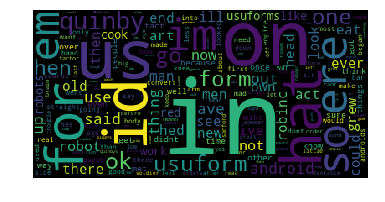

In [17]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!